# Setup and Exploration

In [109]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train',
                                     shuffle=True,
                                     random_state=42)

list(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)

(11314,)
(11314,)


In [25]:
print(type(newsgroups_train.filenames))
print(type(newsgroups_train.target))
print(type(newsgroups_train))
print(newsgroups_train.keys())


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [47]:
print(newsgroups_train.target[:20])

[15  1 17 14  9 16 17  0  2 17  7  9  8  4 17  3 14 19 10  8]


In [90]:
import numpy as np
list(np.unique(newsgroups_train.target))
unique_targets=list(np.unique(newsgroups_train.target))
str_targ=map(str, unique_targets)
print(list(str_targ))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [35]:
print(len(newsgroups_train.data))
print(len(newsgroups_train.filenames))
print(len(newsgroups_train.target_names)) #categories
print(len(newsgroups_train.target))
print(len(newsgroups_train.DESCR))  #like a README

11314
11314
20
11314
9442


In [37]:
print(newsgroups_train.data[0])

From: Christopher.S.Weinberger@williams.edu (Gib)
Subject: Re: Divine providence vs. Murphy's Law
Organization: Williams College, Williamstown, MA
Lines: 21

In article <Apr.19.05.13.28.1993.29224@athos.rutgers.edu> rolfe@junior.dsu.edu (Tim Rolfe) writes:
>Romans 8:28 (RSV)   We know that in everything God works for good with those 
>who love him, who are called according to his purpose. 
>Murphy's Law:  If anything can go wrong, it will.
>We are all quite familiar with the amplifications and commentary on
>Murphy's Law.  But how do we harmonize that with Romans 8:28?  For that
>matter, how appropriate is humor contradicted by Scripture?

	Both Christians and non-Christians laugh at this quote because
it exaggerates something we all feel, but know is not true.  Us
Christians just KNOW that a little better!    :)



			In God we trust!


			-Christopher


			email @ 96csw@williams.edu



In [41]:
print(newsgroups_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [44]:
print(newsgroups_train.filenames[:2])


['C:\\Users\\ohass\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20949'
 'C:\\Users\\ohass\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38465']


In [50]:
print(newsgroups_train.keys())


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


# QUESTION 1

'Q1 ANSWER: Most categories are evenly distributed having between 450 and 600 documents each.  The only exception is\ncategory 19 (talk.religion.misc) with only 377 documents'

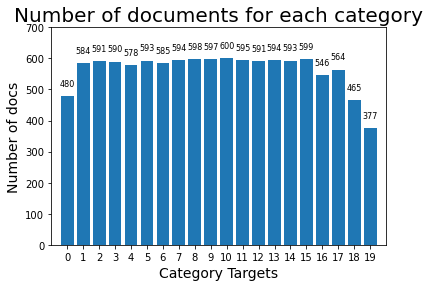

In [110]:
#QUESTION 1: To get started, plot a histogram of the number of training documents for 
#            each of the 20 categories to check if they are evenly distributed.


targets=list(newsgroups_train.target)  #list of all document tagets
cat_count=[]
for n in range(20):    #looping through unique targets (0-19) and getting count
    count = targets.count(n)
    cat_count.append(count)


import matplotlib.pyplot as plt

ucat=range(20)
ucats=map(str,ucat)  #string integers so they're categories in the plot
ucatsl=list(ucats)  

plt.bar(ucatsl, cat_count)
plt.title('Number of documents for each category', fontsize=20)
plt.xlabel('Category Targets', fontsize=14)
plt.ylabel('Number of docs', fontsize=14)
plt.axis([-1,20,0,700])


for x,y in zip(unique_targets,cat_count):
    label = "{:.0f}".format(y)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=8)
    
    
'''Q1 ANSWER: The categories are generally evenly distributed with most 
having between 450 and 600 documents each. The only exception is category 19 (talk.religion.misc)'''

# Fetching subsets of interest

In [111]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [112]:
categories=['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train',
                                   categories = categories,
                                   shuffle = True,
                                   random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test',
                                 categories = categories,
                                 shuffle = True,
                                 random_state = None)

# Brief Exploration

In [130]:
type(train_dataset)
print(train_dataset.keys())
print(len(train_dataset.target))
print(len(train_dataset.data))

print(len(test_dataset.target))
print(len(test_dataset.data))


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
4732
4732
3150
3150


In [139]:
from sklearn.feature_extraction.text import CountVectorizer

#Exploring effect of min_df on retained words - train_dataset
min_dfs = range(1,5)
for x in min_dfs:
    count_vect_tmp = CountVectorizer(min_df=x)
    train_tmp = count_vect_tmp.fit_transform(train_dataset.data)
    print(train_tmp.shape)
    

(4732, 79218)
(4732, 30713)
(4732, 20589)
(4732, 16035)


# QUESTION 2

In [218]:
#QUESTION 2: Use the following specs to extract features from the textual data:
# -use 'english' stopwords of the CountVectorizer
# -Exclude terms that are numbers
# -Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
# -Use min_df=3
# -Report the shape of the TF-IDF matrices of the train and test subsets respectively.

#Build CountVectorizer analyzer
analyzer = CountVectorizer(min_df=3, stop_words="english").build_analyzer()
vectorize = CountVectorizer(min_df=3, stop_words="english")


#check if term is a number
def number_term(t):
    try:
        float(t)
        return True
    except ValueError:
        return False



In [ ]:
#lemmatize
import nltk
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet



In [236]:
#morphing penn treebank tags to WordNet
def penn_to_wordnet(ptag):
    tags = {'JJ':'a',
           'NN':'n',
           'VB':'v',
           'RB':'r'}
    try:
        return tags[ptag[:2]]
    except:
        return 'n'
    
#lemmatize
def lemfxn(doc):
    wnlem = nltk.wordnet.WordNetLemmatizer()
    lemmatize = []
    for word, tag in pos_tag(nltk.word_tokenize(doc)):
        if(not number_term(word)):
            lemmatize.append(wnlem.lemmatize(word.lower(), pos=penn_to_wordnet(tag)))
    lem_output= ' '.join(lemmatize)
    return lem_output


In [222]:
#fit_transform train_dataset
x=vectorize.fit_transform(train_dataset.data)
x.shape

(4732, 20297)

In [248]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

#combine lemmetize and vectorize
lemlist=[]
for d in corpus:
    lemdoc=lemfxn(d)
    lemlist.append(lemdoc)

lemveclist=vectorize.fit_transform(lemlist)
print(lemveclist.shape)
lemveclist.toarray()

(4, 1)


array([[1],
       [1],
       [0],
       [1]], dtype=int64)

In [245]:
#lemmetize and vectorize for train_dataset.data
lemlist=[]
for d in train_dataset.data:
    lemdoc=lemfxn(d)
    lemlist.append(lemdoc)

lemveclist=vectorize.fit_transform(lemlist)

print(lemveclist.shape)

(4732, 17411)


In [246]:
#lemmetize and vectorize for test_dataset.data
lemlist=[]
for d in test_dataset.data:
    lemdoc=lemfxn(d)
    lemlist.append(lemdoc)

lemveclist=vectorize.transform(lemlist)

print(lemveclist.shape)

(3150, 17411)


In [ ]:
'''Question 2 Answer'''